In [ ]:
print("Merhaba, İGÜ - YAPAY ZEKA") # print ekrana çıktı veren bir koddur.


Merhaba, İGÜ - YAPAY ZEKA


In [ ]:

import sys # import python programlama dilinde yazılıma kütüphane eklemeye yarayan bir kod blogudur.
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [ ]:

from google.colab import drive # google colab - drive bağlantısı

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

os.chdir('/content/drive/My Drive/Yapay_Zeka2/')

!pwd # bize kodun çıktısını dosya yolu olarak veren kod blogudur.

/content/drive/My Drive/Yapay_Zeka2


PYTHON PROGRAMLAMA DİLİ KÜTÜPHANELERİ


---


- Scikit-Learn, TensorFlow, PyTorch, Keras


In [ ]:
# CPU ve GPU teknolojisinin kullanımına göre olması gereken veri sayısı tablosu

import pandas as pd

tablo = {
    "Aralık": ["Küçük ölçekli", "Orta ölçekli", "Büyük ölçekli", "Hiper ölçekli", "Exascale"],
    "Veri Sayısı": ["100 - 10,000", "10,000 - 100,000", "100,000 - Milyon",  "Milyon - Milyar", "Milyar - Trilyon"],
    "CPU": ["Evet", "Evet", "Opsiyonel", "Hayır", "Hayır"],
    "GPU": ["Hayır", "Opsiyonel", "Evet", "Evet", "Evet"]
}

print(pd.DataFrame(tablo))

          Aralık       Veri Sayısı        CPU        GPU
0  Küçük ölçekli      100 - 10,000       Evet      Hayır
1   Orta ölçekli  10,000 - 100,000       Evet  Opsiyonel
2  Büyük ölçekli  100,000 - Milyon  Opsiyonel       Evet
3  Hiper ölçekli   Milyon - Milyar      Hayır       Evet
4       Exascale  Milyar - Trilyon      Hayır       Evet


**Kütüphane Kurulumunda dikkat edilmesi gereken en önemli konu:**

Genel kullanım bakımından python kütüphanesi kurucağımız zaman dikkat edilmesi gereken iki yapı bulunmaktadır. Bu yapılar "pip" ve "pip3"'tür.

pip yapısı -> Python 2.x sürümlerini destekler.

pip3 yapısı -> Python 3.x sürümlerini destekler.

In [ ]:
import pandas as pd

# True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)
matris_bilgisi = {
    "Gerçek Pozitif": ["Doğru Pozitif (TP)", "Yanlış Negatif (FN)"],
    "Gerçek Negatif": ["Yanlış Pozitif (FP)", "Doğru Negatif (TN)"]
}

# DataFrame oluşturma
matris = pd.DataFrame(matris_bilgisi, index=["Tahmin Pozitif", "Tahmin Negatif"])

# Tabloyu gösterme
print(matris)

                     Gerçek Pozitif       Gerçek Negatif
Tahmin Pozitif   Doğru Pozitif (TP)  Yanlış Pozitif (FP)
Tahmin Negatif  Yanlış Negatif (FN)   Doğru Negatif (TN)


Karmaşıklık matrisinden sistemin doğruluğunu bulacağımız formül ->

Dogruluk = TP+TN+FP+FN / TP+TN 'dir.

Örneğin: TP = 50, TN = 40, FP = 5, FN = 5 ise; Dogruluk = 50 + 40 + 5 + 5 / 50 + 40 --> 0.9 -> % 90 olarak hesaplanmaktadır.

%90 Model Doğruluk Oranı - %10 Modelin Hata Oranı 'dır.

Hata oranını azaltmak için->

Modelin iyileştirilmesi,
Veri sayısının arttırılması,
Eğitim adım sayısının değiştirilmesi,
Veri seti içerisindeki farklı değişlenlerin - özelliklerin algoritmaya dahil edilmesi.

In [ ]:

# Scikit-Learn kütüphanesinin sisteme dahil edilmesi ve veri setinin işleme alınması

!pip install -U scikit-learn

Scikit-Learn kütüphanesi:

!pip install -U scikit-learn

In [ ]:

from sklearn.datasets import fetch_california_housing
import pandas as pd

# California Housing veri setini yükleme
housing = fetch_california_housing()

# Özellikleri ve hedef değişkeni almak
X = housing.data  # Bağımsız değişkenler (özellikler)
y = housing.target  # Bağımlı değişken (fiyatlar)

# Verileri bir DataFrame'e dönüştürme
df = pd.DataFrame(X, columns=housing.feature_names)
df['PRICE'] = y

# İlk birkaç satırı görüntüleme
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# California Housing veri setini yükleme
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

# Özellikler ve hedef değişkeni ayırma
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Veri setini bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model oluşturma
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin yapma
predictions = model.predict(X_test)
print("Tahmin Sonucları: ", predictions[:5])
print("Gerçek Değerler: ", y_test[:5].values)

# Sistemin Ortalama Hatası (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE) Sonucu:", mse)

# Sistemin R-kare Hatası (R²)
r2 = r2_score(y_test, predictions)
print("R-squared (R²) Sonucu:", r2)

Tahmin Sonucları:  [0.72604907 1.76743383 2.71092161 2.83514727 2.60695807]
Gerçek Değerler:  [0.477   0.458   5.00001 2.186   2.78   ]
Mean Squared Error (MSE) Sonucu: 0.5305677824766758
R-squared (R²) Sonucu: 0.595770232606166


In [ ]:
# TensorFlow kütüphanesinin sisteme dahil edilmesi ve veri setinin işleme alınması

!pip install pydot
!apt-get install graphviz


# Bu iki kütüphane ile oluşturulan yapay zeka modelinin yapısını çıktı alabileceğiz.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.




---


TensorFlow kütüphanesi:

!pip install tensorflow

!pip install tensorflow-gpu


---



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model

(x_train, y_train), (x_test, y_test) = mnist.load_data() # MNIST veri setini yükleme
x_train, x_test = x_train / 255.0, x_test / 255.0
!pwd

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
/content/drive/MyDrive/Yapay_Zeka2


**Yapay zeka modeli oluşturmada aşamalar;**


---

1.Modelin Oluşturulması-->model=models.Sequential()

Yapay zeka modeli oluşturma süreci, birkaç temel aşamadan oluşur. İşte bu aşamalar:

Modelin Oluşturulması: İlk olarak, bir model oluşturmak için Sequential sınıfını kullanıyoruz. Bu, katmanların sıralı olarak yerleştirileceği bir model yapısı sağlar.


---


2.Flateen katmanı-->layersFlatten(input_shape=)()28,280
Bu katman, 2 boyutlu()28*28) bir görüntüyü 1  boyutlu bit vrktöre dönüştürür.28*28=784 boyutlu bir vektördür.
Flatten Katmanı: Ardından, görüntüleri düzleştirmek için bir Flatten katmanı ekliyoruz. Bu katman, 2 boyutlu (28x28) bir görüntüyü 1 boyutlu bir vektöre dönüştürür. Sonuç olarak, bu işlem 784 boyutlu bir vektör elde etmemizi sağlar.


---


3.Dense katmanı->layers.Dense(128activation='relu')
Dense Katmanı: Sonraki adımda, modelimize bir Dense katmanı ekliyoruz. Bu katman, 128 nörondan oluşur ve her bir nöron, bir önceki katmandaki tüm nöronlarla bağlıdır. ReLU (Rectified Linear Unit) aktivasyon fonksiyonu kullanarak, negatif değerleri sıfıra dönüştürerek modelin doğrusal olmayan ilişkileri öğrenmesini sağlarız.
Bu katman, tam bağlı bir katmandır.Yani her bir nöron, bir önceki katmanın tüm nöronlarla bağlıdır.


---


4.Droput katmanı->layers.dropout(0,2)
Dropout Katmanı: Aşırı öğrenmeyi önlemek için bir Dropout katmanı ekliyoruz. Bu katman, eğitim sırasında rastgele nöronların %20'sini devre dışı bırakır ve bu sayede modelin genel performansını artırır.


---


5.Çıkış katmanı
->layers.Dense(10,activation='softmax')
Dense katmanı=bu katman 10 nöron bulunur.

sofmax fonksiyonu,g.r.ş değerlerini olasılıklara çevirir.her bir nöron çıkış 0 ile 1 arasında olacak şekilde normalize edilir ve tüm çıkışların toplamı 1 olur.
Bu aşamalar, basit bir yapay zeka modelinin (örneğin, el yazısı rakamlarını tanıyan bir model) temel yapı taşlarını oluşturmaktadır. Modeli derlemek, eğitim verisi ile eğitmek ve performansını değerlendirmek de sonraki önemli adımlardır.



In [ ]:

model = models.Sequential([ # Modeli oluşturma
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Modelin eğitim süreci**

In [ ]:
model.compile(optimizer='adam', # Modeli derleme
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


**Modelin eğitim süreci**

model eğitim işlemi --> model.fit()

model eğitim işlemi --> model.fit(x_train, y_train, ...)

Eğitim Adım Sayısı --> epochs=5

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8613 - loss: 0.4773
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9555 - loss: 0.1487
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9684 - loss: 0.1045
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9746 - loss: 0.0856
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.9771 - loss: 0.0738


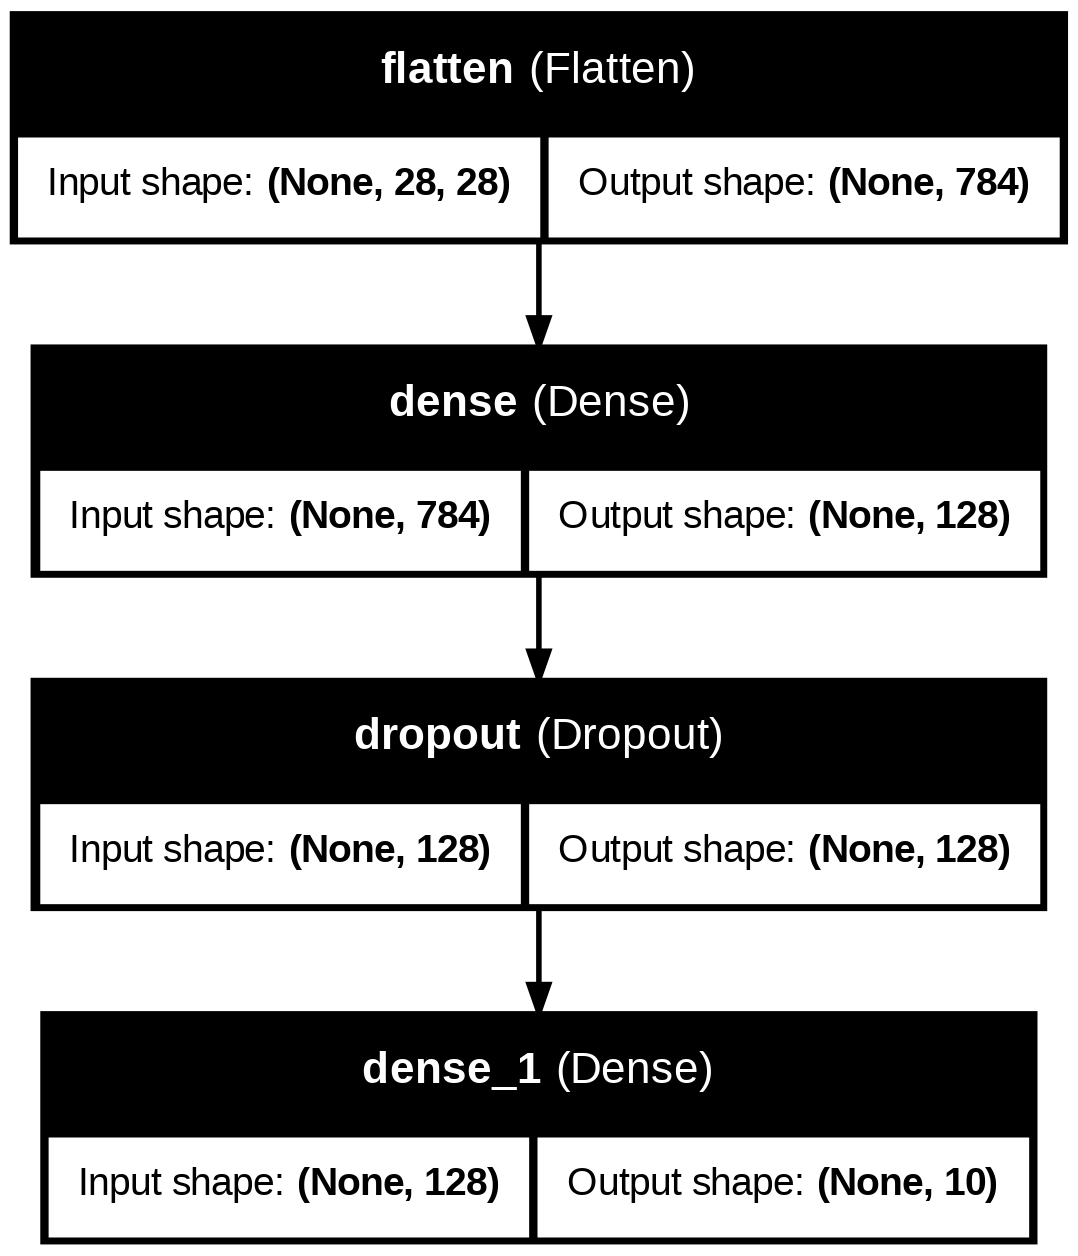

In [ ]:
model.fit(x_train, y_train, epochs=5) # Modeli Eğitilmesi Adımı

# Modeli görselleştirmek ve çalışma alanına kaydetmek için plot_model kullanımı
plot_model(model, to_file='YZ_model_ciktisi/yz_tensoflow_model_ciktisi.png', show_shapes=True, show_layer_names=True) # Modelin Çıktısı


In [ ]:
# Test seti üzerinde modelin performansını değerlendirme

hata_oranı, basarı_oranı = model.evaluate(x_test, y_test, verbose=2)

print(" Modelin Doğruluk Oranı: %", basarı_oranı*100)
print(" Modelin Hata Oranı: %", hata_oranı*100)

313/313 - 1s - 2ms/step - accuracy: 0.9756 - loss: 0.0783
 Modelin Doğruluk Oranı: % 97.5600004196167
 Modelin Hata Oranı: % 7.825401425361633


PyTorch kütüphanesi:

!pip install torch torchvision torchaudio

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 384kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:02<00:00, 800kB/s] 


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.59MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1, Loss: 0.7475840107623194, Accuracy: 81.68666666666667%
Epoch 2, Loss: 0.3655052119766725, Accuracy: 89.6%
Epoch 3, Loss: 0.32135570270896974, Accuracy: 90.79833333333333%
Epoch 4, Loss: 0.29505472430097524, Accuracy: 91.445%
Epoch 5, Loss: 0.27353982729857157, Accuracy: 92.15833333333333%
Epoch 6, Loss: 0.2548250490461967, Accuracy: 92.71666666666667%
Epoch 7, Loss: 0.23816479608289468, Accuracy: 93.21166666666667%
Epoch 8, Loss: 0.2232358081063736, Accuracy: 93.63833333333334%
Epoch 9, Loss: 0.2089082886462908, Accuracy: 94.12166666666667%
Epoch 10, Loss: 0.19691915405806956, Accuracy: 94.41666666666667%
Epoch 11, Loss: 0.18597586209903647, Accuracy: 94.77166666666666%
Epoch 12, Loss: 0.17564510548515105, Accuracy: 95.04666666666667%
Epoch 13, Loss: 0.16661950783220245, Accuracy: 95.29166666666667%
Epoch 14, Loss: 0.15829702595006556, Accuracy: 95.565%
Epoch 15, Loss: 0.15013734612470941, Accuracy: 95.

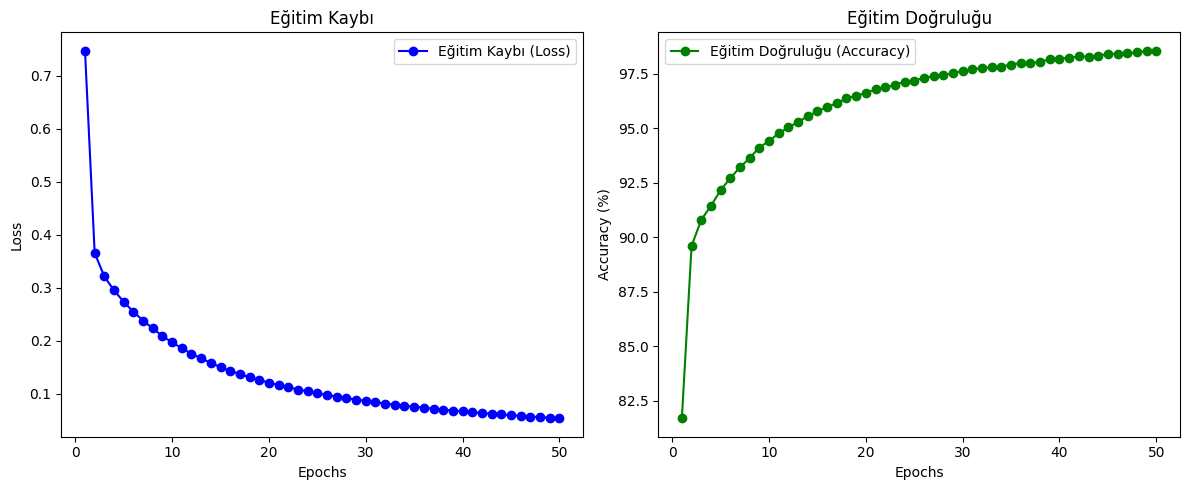

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# MNIST veri setini yükleme
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_set = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST('./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# Modeli oluşturma
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

# Kayıp fonksiyonu ve optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Eğitim için boş listeler tanımla
train_losses = []
train_accuracies = []

# Eğitme döngüsü
for epoch in range(50):  # 50 epoch boyunca eğit
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        # Kayıp (loss) değerini topla
        running_loss += loss.item()

        # Doğruluğu hesapla
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Her epoch sonunda ortalama kayıp ve doğruluk
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}%')

print('Eğitim tamamlandı!')

# Eğitim sonuçlarını grafikle göster
epochs = range(1, 51)  # 50 epoch olduğu için 1'den 51'ya kadar olan epoch'lar
plt.figure(figsize=(12, 5))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'bo-', label='Eğitim Kaybı (Loss)')
plt.title('Eğitim Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'go-', label='Eğitim Doğruluğu (Accuracy)')
plt.title('Eğitim Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

# Test verisi üzerinde modelin performansını değerlendirme
test_loss = 0.0
correct = 0
total = 0

# Test verisi üzerinde modelin kaybını ve doğruluğunu hesapla (gradyan hesaplama yok)
with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        loss = criterion(output, labels)
        test_loss += loss.item()

        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Test seti kaybı ve doğruluğu
test_loss /= len(test_loader)
test_accuracy = 100 * correct / total

print("Test Seti Kaybı: ", test_loss)
print("Test Seti Doğruluğu: ", test_accuracy , "%")

Test Seti Kaybı:  0.08181218460801348
Test Seti Doğruluğu:  97.45 %


**Keras kütüphanesi:**

!pip install keras

In [ ]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

# Modeli oluşturma
#model = Sequential()
#model.add(Dense(128, activation='relu', input_shape=(28*28,)))
#model.add(Dense(10, activation='softmax'))

# Modeli derleme
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Eğitme
#model.fit(x_train, y_train, epochs=5)